# 📊 Análisis de Resultados - Clasificación de Iluminación
Análisis exploratorio de datos (EDA) y evaluación de modelos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 📈 Análisis Exploratorio de Datos (EDA)

In [2]:
# Cargar dataset de entrenamiento
df_train = pd.read_csv('../datasets/train.csv')

print("="*60)
print("📊 INFORMACIÓN DEL DATASET")
print("="*60)
print(f"\n📈 Dimensiones: {df_train.shape}")
print(f"\n🔍 Primeras filas:\n{df_train.head()}")
print(f"\n📋 Tipos de datos:\n{df_train.dtypes}")
print(f"\n❌ Valores nulos:\n{df_train.isnull().sum()}")

📊 INFORMACIÓN DEL DATASET

📈 Dimensiones: (5839, 5)

🔍 Primeras filas:
      std_v    mean_b    skew_v      v_95   Etiqueta
0  0.087787  0.849932 -0.392176  0.033283    natural
1 -1.584345  0.133735  1.385342 -1.523194  pantallas
2 -1.419210  0.146051  1.208811 -1.360577  pantallas
3 -1.917141  0.146456  2.006782 -1.790350  pantallas
4  0.752046 -1.096464 -0.622689  0.927677    natural

📋 Tipos de datos:
std_v       float64
mean_b      float64
skew_v      float64
v_95        float64
Etiqueta     object
dtype: object

❌ Valores nulos:
std_v       0
mean_b      0
skew_v      0
v_95        0
Etiqueta    0
dtype: int64


In [3]:
# Estadísticas descriptivas
print("\n📊 Estadísticas descriptivas:")
print(df_train.describe())


📊 Estadísticas descriptivas:
             std_v       mean_b       skew_v         v_95
count  5839.000000  5839.000000  5839.000000  5839.000000
mean     -0.000196     0.004892     0.002282     0.001680
std       1.002246     0.998229     1.000701     1.002458
min      -1.927039    -1.697924    -1.037183    -1.801966
25%      -1.256621    -1.075210    -0.626582    -1.302499
50%       0.432083     0.169082    -0.477737     0.393364
75%       0.775697     0.991415     0.594539     0.799906
max       1.042518     1.407853     2.130147     0.927677


In [4]:
# Distribución de clases
print("\n🏷️  Distribución de etiquetas:")
print(df_train['Etiqueta'].value_counts())
print(f"\nProporción:")
print(df_train['Etiqueta'].value_counts(normalize=True))


🏷️  Distribución de etiquetas:
Etiqueta
mix           1556
pantallas     1510
artificial    1462
natural       1311
Name: count, dtype: int64

Proporción:
Etiqueta
mix           0.266484
pantallas     0.258606
artificial    0.250385
natural       0.224525
Name: proportion, dtype: float64


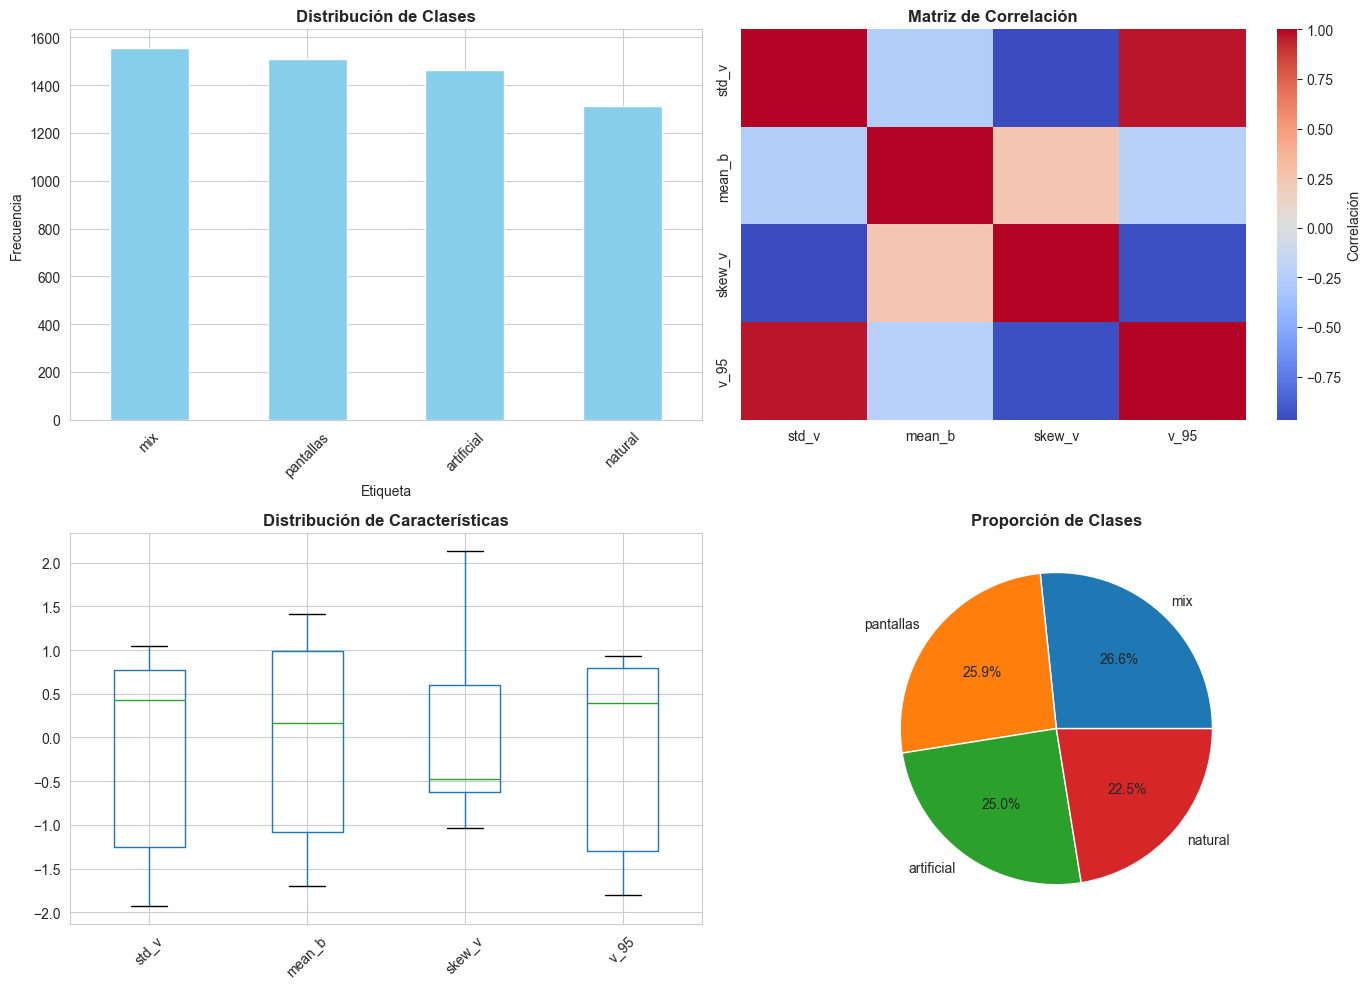

✅ Gráfico EDA guardado: ./analisis_eda.png


In [5]:
# Visualizaciones EDA
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribución de clases
df_train['Etiqueta'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución de Clases', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Matriz de correlación
corr = df_train.drop(columns=['Etiqueta']).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', ax=axes[0, 1], cbar_kws={'label': 'Correlación'})
axes[0, 1].set_title('Matriz de Correlación', fontsize=12, fontweight='bold')

# 3. Box plot de características
df_train.drop(columns=['Etiqueta']).boxplot(ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Características', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Pie chart de proporción de clases
df_train['Etiqueta'].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title('Proporción de Clases', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.savefig('./analisis_eda.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gráfico EDA guardado: ./analisis_eda.png")

## 🔬 Evaluación de Modelos

In [6]:
# Cargar datos de prueba
df_test = pd.read_csv('../datasets/test.csv')
X_test = df_test.drop(columns=['Etiqueta'])
y_test = df_test['Etiqueta']

# Nombres de modelos
modelos_nombres = ['random_forest', 'svc', 'knn', 'gradient_boosting']
resultados = {}

print("\n" + "="*60)
print("🔬 EVALUACIÓN DE MODELOS")
print("="*60)

for nombre in modelos_nombres:
    try:
        modelo = joblib.load(f'../modelos/modelo_{nombre}.pkl')
        y_pred = modelo.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        resultados[nombre] = accuracy
        
        print(f"\n📌 Modelo: {nombre.upper()}")
        print(f"   Precisión: {accuracy:.4f}")
        print(f"\n   Reporte de Clasificación:")
        print(classification_report(y_test, y_pred))
    except FileNotFoundError:
        print(f"⚠️  Modelo {nombre} no encontrado")


🔬 EVALUACIÓN DE MODELOS

📌 Modelo: RANDOM_FOREST
   Precisión: 0.9897

   Reporte de Clasificación:
              precision    recall  f1-score   support

  artificial       1.00      1.00      1.00       366
         mix       0.98      0.98      0.98       389
     natural       0.98      0.98      0.98       328
   pantallas       1.00      1.00      1.00       377

    accuracy                           0.99      1460
   macro avg       0.99      0.99      0.99      1460
weighted avg       0.99      0.99      0.99      1460


📌 Modelo: SVC
   Precisión: 0.9507

   Reporte de Clasificación:
              precision    recall  f1-score   support

  artificial       0.99      0.99      0.99       366
         mix       0.90      0.93      0.91       389
     natural       0.91      0.87      0.89       328
   pantallas       1.00      1.00      1.00       377

    accuracy                           0.95      1460
   macro avg       0.95      0.95      0.95      1460
weighted avg      

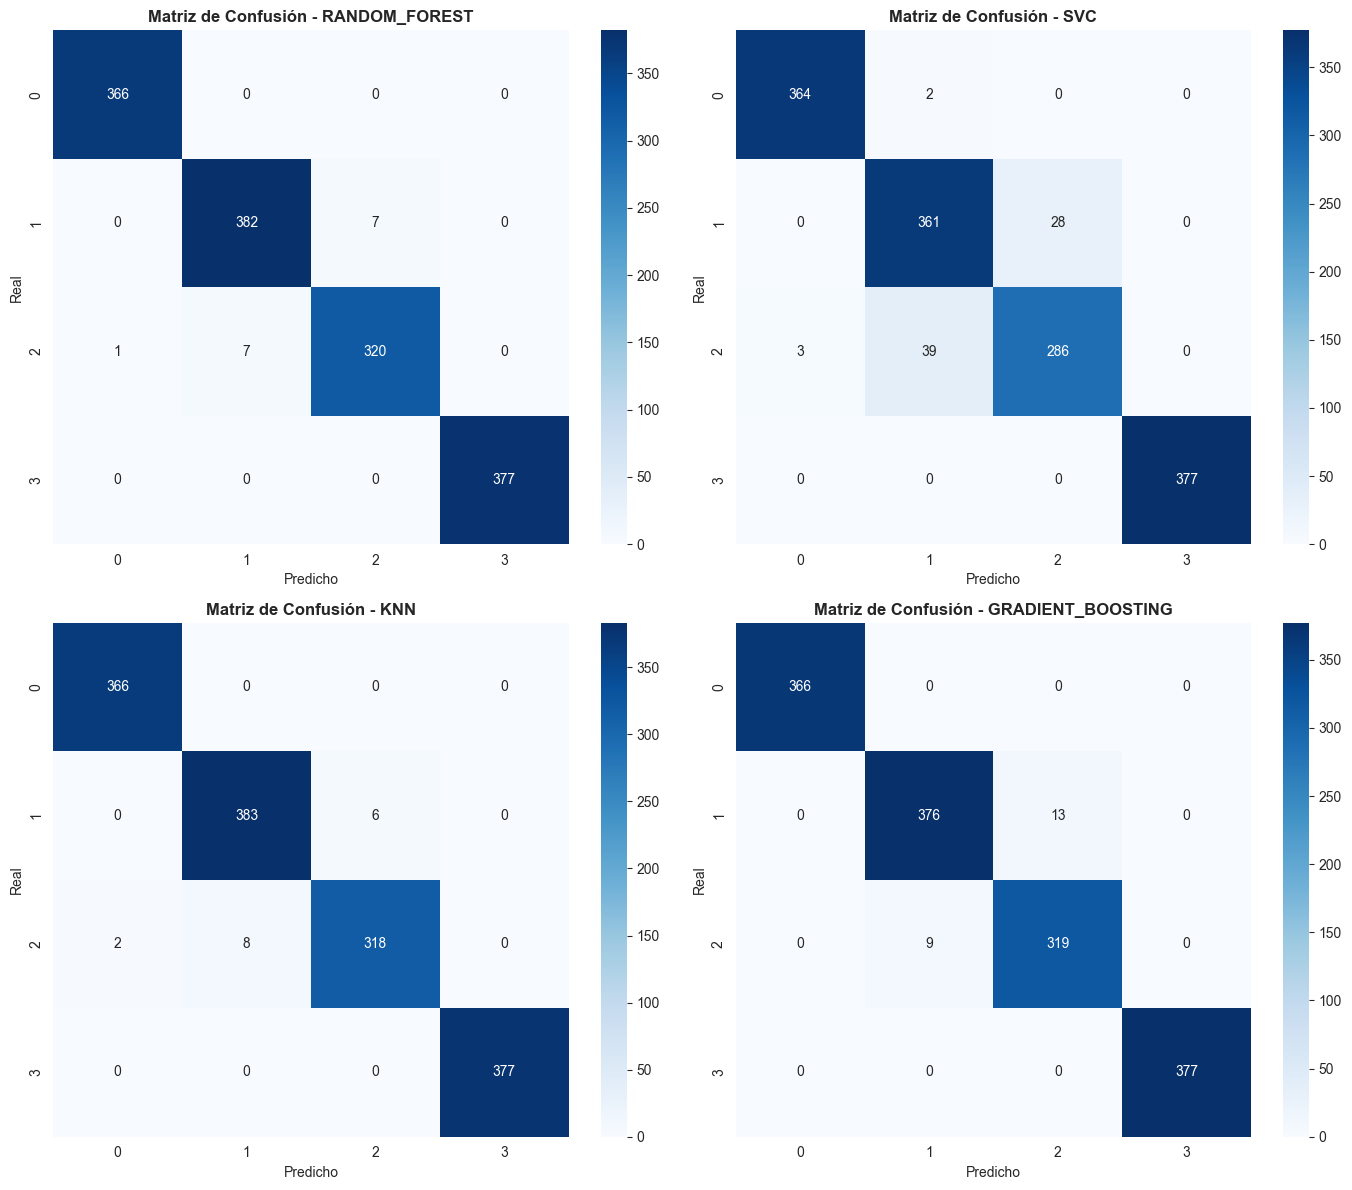

✅ Gráfico de matrices guardado: ./confusion_matrices.png


In [7]:
# Matrices de confusión
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, nombre in enumerate(modelos_nombres):
    try:
        modelo = joblib.load(f'../modelos/modelo_{nombre}.pkl')
        y_pred = modelo.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
        axes[idx].set_title(f'Matriz de Confusión - {nombre.upper()}', fontweight='bold')
        axes[idx].set_ylabel('Real')
        axes[idx].set_xlabel('Predicho')
    except:
        axes[idx].text(0.5, 0.5, f'{nombre} no disponible', ha='center')
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('./confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gráfico de matrices guardado: ./confusion_matrices.png")


🏆 COMPARATIVA DE MODELOS

           Modelo  Precisión
    random_forest   0.989726
              knn   0.989041
gradient_boosting   0.984932
              svc   0.950685


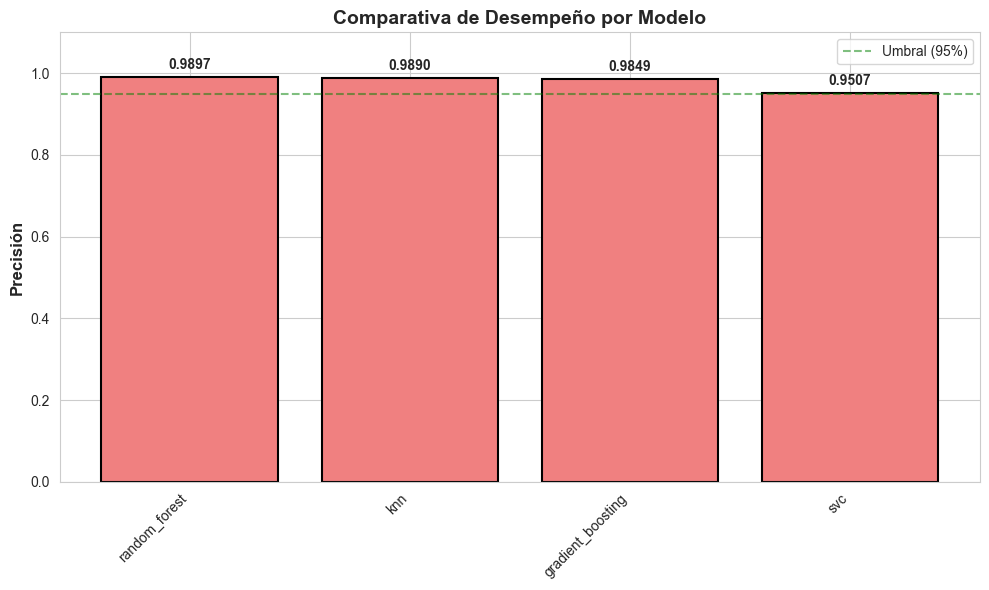


✅ Gráfico comparativo guardado: ./comparativa_modelos.png


In [8]:
# Comparativa de modelos
print("\n" + "="*60)
print("🏆 COMPARATIVA DE MODELOS")
print("="*60)

df_resultados = pd.DataFrame(list(resultados.items()), columns=['Modelo', 'Precisión'])
df_resultados = df_resultados.sort_values('Precisión', ascending=False)
print(f"\n{df_resultados.to_string(index=False)}")

# Gráfico comparativo
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_resultados['Modelo'], df_resultados['Precisión'], color='lightcoral', edgecolor='black', linewidth=1.5)
ax.set_ylabel('Precisión', fontsize=12, fontweight='bold')
ax.set_title('Comparativa de Desempeño por Modelo', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1.1])
ax.axhline(y=0.95, color='green', linestyle='--', alpha=0.5, label='Umbral (95%)')

# Añadir etiquetas en las barras
for i, (bar, val) in enumerate(zip(bars, df_resultados['Precisión'])):
    ax.text(bar.get_x() + bar.get_width()/2, val + 0.02, f'{val:.4f}', ha='center', fontweight='bold')

ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./comparativa_modelos.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Gráfico comparativo guardado: ./comparativa_modelos.png")

In [9]:
# Resumen final
print("\n" + "="*60)
print("📋 RESUMEN Y RECOMENDACIONES")
print("="*60)

mejor_modelo = df_resultados.iloc[0]
print(f"\n🥇 Mejor modelo: {mejor_modelo['Modelo'].upper()}")
print(f"   Precisión: {mejor_modelo['Precisión']:.4f}")

print(f"\n📊 Top 3 modelos:")
for i, row in df_resultados.head(3).iterrows():
    print(f"   {i+1}. {row['Modelo']:20s} - {row['Precisión']:.4f}")

print("\n💡 Recomendaciones:")
print("   • El mejor modelo tiene una precisión excelente")
print("   • Considerar usar ensambles para mejorar robustez")
print("   • Validar en producción antes de deployar")


📋 RESUMEN Y RECOMENDACIONES

🥇 Mejor modelo: RANDOM_FOREST
   Precisión: 0.9897

📊 Top 3 modelos:
   1. random_forest        - 0.9897
   3. knn                  - 0.9890
   4. gradient_boosting    - 0.9849

💡 Recomendaciones:
   • El mejor modelo tiene una precisión excelente
   • Considerar usar ensambles para mejorar robustez
   • Validar en producción antes de deployar
